### Importing Basic Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### Loading the dataset

In [22]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['v1', 'v2']

In [23]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [24]:
df.tail(10)

,v1,v2
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [25]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

### Data Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_data = df['v1'].values
y_data = le.fit_transform(y_data)
print(y_data)

[0 0 1 ... 0 0 0]


In [27]:
print(df['v1'])

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


### Removing Stopwords & Stemming

In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load English stopwords and create a Porter stemmer
sw = set(stopwords.words('english'))
ps = PorterStemmer()

# Define a function for text cleaning
def cleantext(sample):
    # Convert the text to lowercase
    sample = sample.lower()

    # Replace "<br/ ><br/ >" with a space
    sample = sample.replace("<br/ ><br/ >", " ")

    # Remove non-alphabetic characters and keep only letters
    sample = re.sub("[^a-zA-Z]+", " ", sample)

    # Tokenize the text into a list of words
    sample = sample.split(" ")

    # Apply stemming and remove stopwords
    sample = [ps.stem(s) for s in sample if s not in sw]

    # Join the cleaned words into a string
    sample = " ".join(sample)

    return sample

In [29]:
cleantext(df['v2'][0])


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat '

In [30]:
cleantext(df['v2'][1])

'ok lar joke wif u oni '

In [31]:
df['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [32]:
df['v2'][3]

'U dun say so early hor... U c already then say...'

In [33]:
df['cleanedmessage']=df['v2'].apply(cleantext)
corpus=df['cleanedmessage'].values


### Feature Extraction

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Create a CountVectorizer with specified parameters
cv = CountVectorizer(max_df=0.5, max_features=50000)

# Fit and transform the corpus using CountVectorizer
x_data = cv.fit_transform(corpus)

# Print the shape of the transformed data
print(x_data.shape)  # Output: (5572, 6221)

# Print the first row of the transformed data (sparse matrix format)
print(x_data[0])

(5572, 6221)
  (0, 2148)	1
  (0, 2794)	1
  (0, 4046)	1
  (0, 1162)	1
  (0, 377)	1
  (0, 732)	1
  (0, 2222)	1
  (0, 6060)	1
  (0, 2898)	1
  (0, 730)	1
  (0, 957)	1
  (0, 2185)	1
  (0, 188)	1
  (0, 5886)	1


In [35]:
# Create a TfidfTransformer
tfidf = TfidfTransformer()

# Transform the count matrix (x_data) to TF-IDF representation
x_data_tfidf = tfidf.fit_transform(x_data)

# Print the first row of the TF-IDF transformed data
print(x_data_tfidf[0])

  (0, 6060)	0.23615475543085504
  (0, 5886)	0.19459721085856557
  (0, 4046)	0.24054119706179242
  (0, 2898)	0.2850448490727193
  (0, 2794)	0.352275555327129
  (0, 2222)	0.19459721085856557
  (0, 2185)	0.16514812015268623
  (0, 2148)	0.14084052842905104
  (0, 1162)	0.2728131680559814
  (0, 957)	0.29760381268143565
  (0, 732)	0.29760381268143565
  (0, 730)	0.3362850956787249
  (0, 377)	0.2634906267537017
  (0, 188)	0.352275555327129


In [36]:
x_data.shape


(5572, 6221)

In [37]:
y_data.shape

(5572,)

### Splitting Dataset


In [38]:
from sklearn.model_selection import train_test_split
import itertools

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.

    Parameters:
    - cm: Confusion matrix
    - classes: List of class names
    - title: Title of the plot
    - normalize: If True, normalize the confusion matrix
    - cmap: Colormap for the plot
    """
    # Check if normalization is requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    # Set tick marks and labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Format for text in cells
    fmt = '.2f' if normalize else 'd'
    
    # Add text annotations to cells
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Label axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [39]:
def perf_measure(y_actual, y_hat):
    # Convert input lists to NumPy arrays for better array operations
    y_actual = np.array(y_actual)
    y_hat = np.array(y_hat)
    
    # Initialize variables for True Positive, False Positive, True Negative, and False Negative
    TP = 0  # True Positive
    FP = 0  # False Positive
    TN = 0  # True Negative
    FN = 0  # False Negative

    # Iterate through each prediction and actual label
    for i in range(len(y_hat)): 
        # True Positive: Actual is positive, and predicted is also positive
        if y_actual[i] == y_hat[i] and y_hat[i] == 1:
            TP += 1
        # False Positive: Actual is negative, but predicted is positive
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        # True Negative: Actual is negative, and predicted is also negative
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        # False Negative: Actual is positive, but predicted is negative
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1

    # Return the counts of True Positive, False Positive, True Negative, and False Negative
    return TP, FP, TN, FN


### Importing necessary Classifiers

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

## Logistics Regression


In [41]:
clf_lr= LogisticRegression(solver='liblinear', penalty='l1')
clf_lr.fit(X_train, y_train)
pred_lr=clf_lr.predict(X_test)
clf_lr.score(X_test,y_test)


0.979066985645933

In [42]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Confusion matrix, without normalization
[[1451    2]
 [  33  186]]


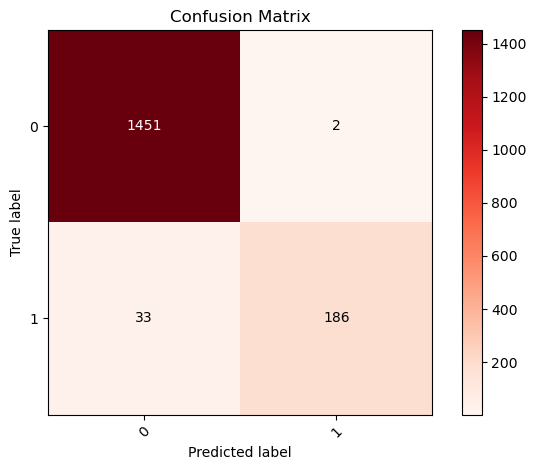

In [43]:
cnf_matrix_lr=confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cnf_matrix_lr,[0,1],normalize=False, cmap="Reds",title="Confusion Matrix")

Normalized confusion matrix
[[0.99862354 0.00137646]
 [0.15068493 0.84931507]]


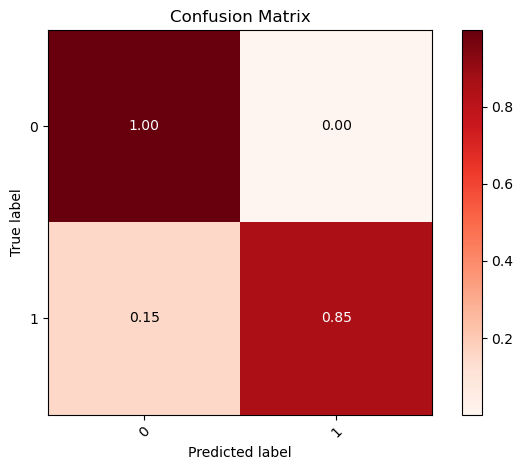

In [44]:
cnf_matrix_lr=confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cnf_matrix_lr,[0,1],normalize=True,cmap="Reds",title="Confusion Matrix")

## Multinomial Naive Bayes


In [45]:
clf_mnb=MultinomialNB(alpha = 0.3) 

clf_mnb.fit(X_train,y_train)
pred_mnb=clf_mnb.predict(X_test)
acc_mnb=clf_mnb.score(X_test,y_test)

print("Accuracy : ",acc_mnb)

Accuracy :  0.9712918660287081


In [46]:
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1453
           1       0.85      0.94      0.90       219

    accuracy                           0.97      1672
   macro avg       0.92      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672



Confusion matrix, without normalization
[[1418   35]
 [  13  206]]


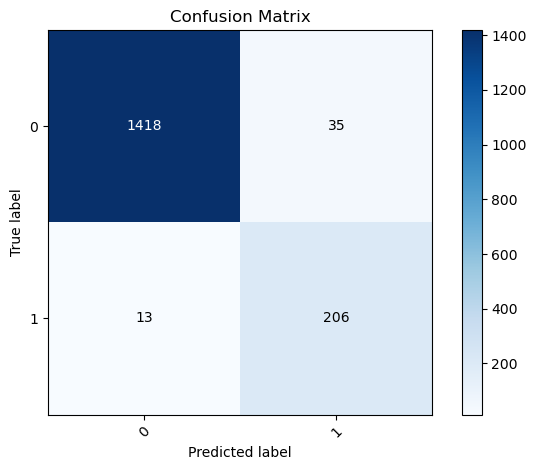

In [47]:
cnf_matrix_mnb=confusion_matrix(y_test,pred_mnb)
plot_confusion_matrix(cnf_matrix_mnb,[0,1],normalize=False, cmap="Blues",title="Confusion Matrix")

Normalized confusion matrix
[[0.97591191 0.02408809]
 [0.05936073 0.94063927]]


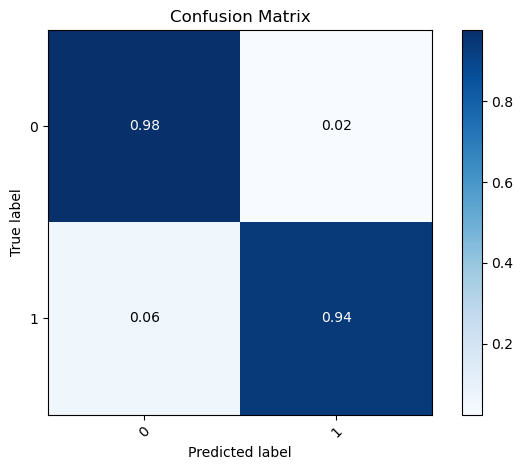

In [48]:
cnf_matrix_mnb=confusion_matrix(y_test,pred_mnb)
plot_confusion_matrix(cnf_matrix_mnb,[0,1],normalize=True,cmap='Blues',title="Confusion Matrix")

### Support Vector Machines

In [49]:
clf_svm = svm.SVC(kernel='sigmoid', gamma=2.0, probability=True)

clf_svm.fit(X_train,y_train)
pred_svm=clf_svm.predict(X_test)
acc_svm=clf_svm.score(X_test,y_test)

print("Accuracy : ",acc_svm)

Accuracy :  0.8809808612440191


In [50]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1453
           1       0.55      0.53      0.54       219

    accuracy                           0.88      1672
   macro avg       0.74      0.73      0.73      1672
weighted avg       0.88      0.88      0.88      1672



Confusion matrix, without normalization
[[1358   95]
 [ 104  115]]


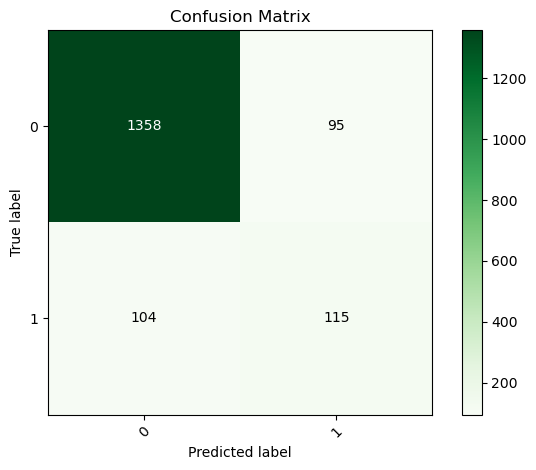

In [51]:
cnf_matrix_svm=confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cnf_matrix_svm,[0,1],normalize=False,cmap="Greens",title="Confusion Matrix")

Normalized confusion matrix
[[0.93461803 0.06538197]
 [0.47488584 0.52511416]]


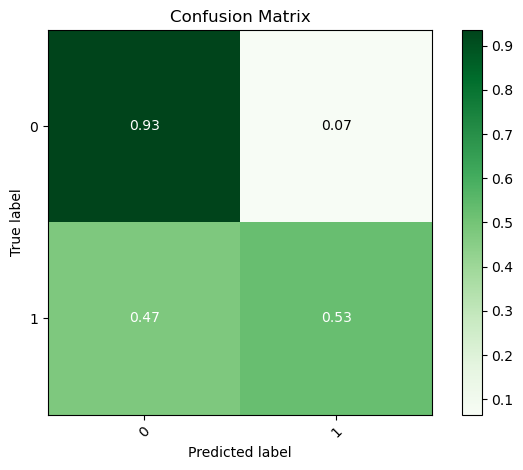

In [52]:
cnf_matrix_svm=confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cnf_matrix_svm,[0,1],normalize=True,cmap="Greens",title="Confusion Matrix")

## Spam Classification

In [53]:
classifiers=[]

classifiers.append(('LogisticRegression',clf_lr))
classifiers.append(('MNB',clf_mnb))
classifiers.append(('SVM',clf_svm))

In [61]:
result = []  # List to store performance metrics
cnf_matrix_parameters = []  # List to store confusion matrix parameters

# Iterate through classifiers
for i, v in classifiers:
    # Make predictions using the current classifier
    pred = v.predict(X_test)
    
    # Calculate accuracy, precision, recall, and F1-score
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f_measure = f1_score(y_test, pred)
    
    # Append performance metrics to the result list
    result.append((i, acc, precision, recall, f_measure))
    
    # Compute True Positive, False Positive, True Negative, and False Negative
    TP, FP, TN, FN = perf_measure(y_test, pred)
    
    # Append confusion matrix parameters to the cnf_matrix_parameters list
    cnf_matrix_parameters.append((i, TP, FP, TN, FN))


In [59]:
column_names=['Algorithm','Accuracy','Precision','Recall','F-measure']
df1=pd.DataFrame(result,columns=column_names)
print(df1)

            Algorithm  Accuracy  Precision    Recall  F-measure
0  LogisticRegression  0.979067   0.989362  0.849315   0.914005
1                 MNB  0.971292   0.854772  0.940639   0.895652
2                 SVM  0.880981   0.547619  0.525114   0.536131


In [71]:
column_names=['Algorithm','True_Pos','False_Pos','True_Neg','False_Neg']
df2=pd.DataFrame(cnf_matrix_parameters,columns=column_names)
print(df2)

            Algorithm  True_Pos  False_Pos  True_Neg  False_Neg
0  LogisticRegression       186          2      1451         33
1                 MNB       206         35      1418         13
2                 SVM       115         95      1358        104
